In [1]:
import numpy as np
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [2]:
df = obb.equity.price.historical(
    "AAPL",
    start_date="2020-01-01",
    provider="yfinance"
)

In [3]:
close = df["close"]

In [4]:
# Calculate simple returm
returns = close.pct_change()

In [5]:
# Calculate the daily standard deviaation of returns 
std_dev = returns.dropna().std()

In [6]:
annualized_std_dev = std_dev * np.sqrt(252)

In [13]:
close.index = pd.to_datetime(close.index)
(
    close
    .pct_change(freq="ME")
    .dropna()
    .std()
    * np.sqrt(12)
)

np.float64(0.2920819728239062)

In [15]:
(
    close
    .pct_change(freq="QE")
    .dropna()
    .std()
    * np.sqrt(4)
)

np.float64(0.35651980458263866)

<Axes: xlabel='date'>

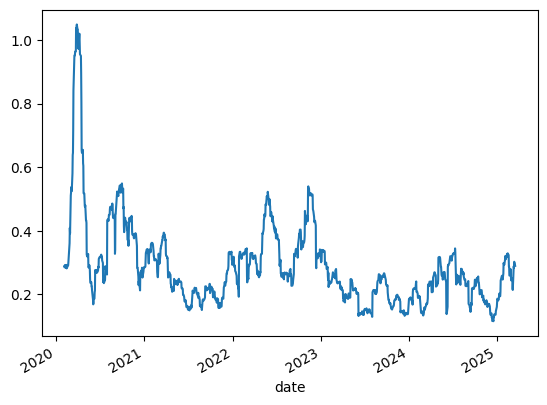

In [17]:
(
    close
    .pct_change()
    .rolling(window=22)
    .std()
    * np.sqrt(252)
).plot()

In [19]:
# Here we are calculating the cumulative sum of simple returns
returns = close.pct_change()

In [21]:
returns[np.isnan(returns)] = 0

In [23]:
returns.fillna(0.0, inplace=True)

In [25]:
returns += 1

In [27]:
# we use the cumprod method to build the cumulative product returns
cumulative_returns = returns.cumprod() - 1

<Axes: xlabel='date'>

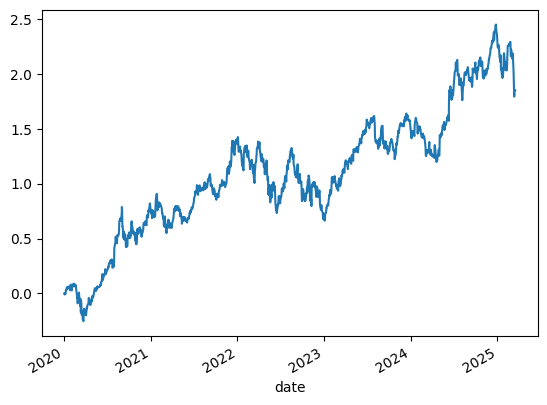

In [29]:
cumulative_returns.plot()

In [31]:
# Here we are calculating the cumlulative sum of compound returns
log_returns = np.log(close / close.shift())

In [35]:
# We use the cumsum method to build the cumulative product of returns
cumulative_log_returns = log_returns.cumsum()

<Axes: xlabel='date'>

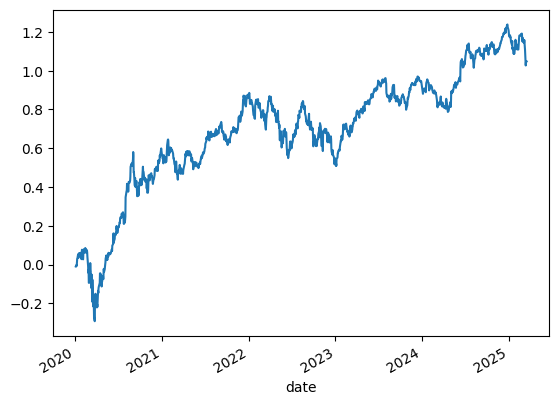

In [37]:
cumulative_log_returns.plot()